# Viterbi decoding

**Viterbi decoding** consists in
picking the best global hidden state sequence  $\widehat{y}$ as follows:

\begin{equation}
\widehat{y} = \text{argmax}_{y \in \Lambda^N} P(Y=y|X=x) = \text{argmax}_{y \in \Lambda^N} P(X=x,Y=y).
\end{equation}


The Viterbi algorithm  is very similar to the forward procedure of the FB algorithm,
making use of the same trellis structure to efficiently represent the exponential number of sequences without prohibitive computation costs. In fact, the only
difference from the forward-backward algorithm is in the recursion where **instead of summing over all possible hidden states, we take their maximum**.


\begin{equation}
\mathbf{Viterbi }\;\;\;\;  \mathrm{viterbi}(i, \pmb{x}, y_i) = \max_{y_1...y_{i-1}} P(Y_1=y_1,\ldots Y_i = y_i , X_1=x_1,\ldots, X_i=x_i)
\end{equation}

The Viterbi trellis represents the path with maximum probability in
position
$i$ when we are in state $Y_i=y_i$ and that we have observed $x_1,\ldots,x_i$
up to that position. The Viterbi algorithm is defined by the
following recurrence of the viterbi values: 

\begin{eqnarray}
\mathrm{viterbi}(1, \pmb{x}, c_k) &=& P_{\mathrm{init}}(c_k|\text{ start}) \times 
P_{\mathrm{emiss}}(x_1 | c_k)
 \\
 \mathrm{viterbi}(i, \pmb{x}, c_k) &=& \left( \displaystyle \max_{c_l \in \Lambda} P_{\mathrm{trans}}(c_k | c_l) \times \mathrm{viterbi}(i-1, \pmb{x}, c_l) \right) \times P_{\mathrm{emiss}}(x_i | c_k)
  \\
  \mathrm{viterbi}(N+1, \pmb{x}, \text{ stop}) &=& \max_{c_l \in \Lambda} P_{\mathrm{final}}(\text{ stop} | c_l) \times \mathrm{viterbi}(N, \pmb{x}, c_l)
\end{eqnarray}

Once the viterbi value at the last position ``viterbi(N,x,c_l)`` is computed the algorithm can backtrack using the following recurrence

\begin{eqnarray}
  \mathrm{backtrack}(N+1, \pmb{x}, \text{ stop}) &=& \text{argmax}_{c_l \in \Lambda} P_{\mathrm{final}}(\text{ stop} | c_l) \times \mathrm{viterbi}(N,\pmb{x}, c_l).
 \\
\mathrm{backtrack}(i,\pmb{x}, c_k) &=& \left( \displaystyle \text{argmax}_{c_l \in \Lambda} P_{\mathrm{trans}}(c_k | c_l) \times \mathrm{viterbi}(i-1,\pmb{x}, c_l) \right) 
 \end{eqnarray}

The following  pseudo code  is the Viterbi algorithm.
Note the similarity with the forward algorithm.
The only differences are:

- Maximizing instead of summing;
- Keeping the argmax's to backtrack.

<img src="../images_for_notebooks/day_2/viterbi.png"  style="max-width:100%; width: 80%">




In [37]:
    # THIS CANT GO INTO THE STUDENT VERSION
    def run_viterbi(self, initial_scores, transition_scores, final_scores, emission_scores):

        length = np.size(emission_scores, 0) # Length of the sequence.
        num_states = np.size(initial_scores) # Number of states.

        # Viterbi variables.
        viterbi = np.zeros([length, num_states]) + logzero()
        backtrack = np.zeros([length, num_states], dtype=int)

        # Initialization.
        viterbi[0,:] = emission_scores[0,:] + initial_scores

        # viterbi loop.
        for pos in xrange(1,length):
            for current_state in xrange(num_states):
                # Note the fact that multiplication in log domain turns a sum and sum turns a logsum
                viterbi_score = viterbi[pos-1, :] + transition_scores[pos-1, current_state, :]
                viterbi[pos, current_state] = np.max(viterbi_score)
                viterbi[pos, current_state] += emission_scores[pos, current_state]
                backtrack[pos, current_state] = np.argmax(viterbi_score)

        best_score = np.max(viterbi[-1, :] + final_scores)
        
        best_path = np.zeros(length, dtype=int)
        best_path[-1] = np.argmax(viterbi[-1, :] + final_scores)

        for pos in xrange(length-2,-1,-1):
            #best_path[pos] = int(np.argmax(backtrack[pos+1]))
            best_path[pos] = backtrack[pos+1, best_path[pos+1]]

        return best_path , best_score 


# Exercise 2.8

**Implement the method  ``run_viterbi`` for performing Viterbi decoding
in file ```lxmls/sequences/sequence_classification_decoder.py.```**

This method at the moment raises a NotImplementedError

    def run_viterbi(self, initial_scores,transition_scores,final_scores,emission_scores):
        # Complete Exercise 2.8 
        raise NotImplementedError, "Complete Exercise 2.8" 
        # THIS FUNCTION SHOULD RETURN 
        # best_states, total_score 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# We will this append to ensure we can import lxmls toolking
sys.path.append('../../lxmls-toolkit')

In [38]:
import lxmls.sequences.hmm as hmmc
import lxmls.readers.simple_sequence as ssr
simple = ssr.SimpleSequence()
hmm = hmmc.HMM(simple.x_dict, simple.y_dict)
hmm.train_supervised(simple.train, smoothing=0.1)

Now use ```hmm.viterbi_decode``` to predict the sequence of tags for a given sequence of visible states. 

Notice that ```hmm.viterbi_decode``` ( which can be located in ```sequences/sequence_classifier```) uses the method ```SequenceClassificationDecoder.run_viterbi``` (from the folder ```sequences/sequence_classification_decoder```).

In [39]:
y_pred, score = hmm.viterbi_decode(simple.test.seq_list[0])

In [40]:
y_pred

walk/rainy walk/rainy shop/sunny clean/sunny 

In [41]:
y_pred, score = hmm.viterbi_decode(simple.test.seq_list[0])
print "Viterbi decoding Prediction test 0 with smoothing:\n\t", y_pred, "\nscore:\n\t",score

print "\nA correct implementation of Viterbi decoding Prediction test 0 with smoothing"
print "should return:"
print "\t", "walk/rainy walk/rainy shop/sunny clean/sunny "
print "score:"
print "\t",-6.02050124698

Viterbi decoding Prediction test 0 with smoothing:
	walk/rainy walk/rainy shop/sunny clean/sunny  
score:
	-6.02050124698

A correct implementation of Viterbi decoding Prediction test 0 with smoothing
should return:
	walk/rainy walk/rainy shop/sunny clean/sunny 
score:
	-6.02050124698


In [42]:
print "Truth test 0:\n\t", simple.test.seq_list[0]

Truth test 0:
	walk/rainy walk/sunny shop/sunny clean/sunny 


In [43]:
y_pred, score = hmm.viterbi_decode(simple.test.seq_list[1])
print "Viterbi decoding Prediction test 1 with smoothing:\n\t", y_pred
print "score:"
print "\t",score

print "\nA correct implementation of Viterbi decoding Prediction test 0 with smoothing"
print "should return"
print "\t",simple.test.seq_list[1] 
print "score:"
print "\t",-11.713974074

Viterbi decoding Prediction test 1 with smoothing:
	clean/sunny walk/sunny tennis/sunny walk/sunny 
score:
	-11.713974074

A correct implementation of Viterbi decoding Prediction test 0 with smoothing
should return
	clean/sunny walk/sunny tennis/sunny walk/sunny 
score:
	-11.713974074


# Part of Speech Tagging (POS)

Part-of-Speech (PoS) tagging is one of the most important NLP tasks. The
task is to assign each word a grammatical category, or Part-of-Speech, such as noun,
verb, adjective,... Recalling the defined notation, $\Sigma$ is a 
vocabulary of word types, and 
$\Lambda$ is the set of Part-of-Speech tags.

In English, using the Penn Treebank (PTB) corpus , the current
state of the art for part of speech tagging is around 97\% for a
variety of methods.

In the rest of this class we will use a subset of the PTB corpus, but
instead of using the original 45 tags we will use a reduced tag set of
12 tags, to make the algorithms faster for the
class. In this task, $x$ is a sentence (for example, a sequence of word tokens) and $y$
is the sequence of possible PoS tags.


In [44]:
import lxmls.readers.pos_corpus as pcc
corpus = pcc.PostagCorpus()

#path_to_data = path_inside_lxmls_toolkit_student + "/data/"
path_to_data = "../../lxmls-toolkit/data/"

train_seq = corpus.read_sequence_list_conll(path_to_data + "train-02-21.conll",max_sent_len=15,max_nr_sent=1000)
test_seq = corpus.read_sequence_list_conll(path_to_data + "test-23.conll",max_sent_len=15,max_nr_sent=1000)
dev_seq = corpus.read_sequence_list_conll(path_to_data + "dev-22.conll",max_sent_len=15,max_nr_sent=1000)

In [45]:
len(train_seq)

1000

In [46]:
train_seq[1]

The/det luxury/noun auto/noun maker/noun last/adj year/noun sold/verb 1,214/num cars/noun in/adp the/det U.S./noun 

In [1]:
hmm = hmmc.HMM(corpus.word_dict, corpus.tag_dict)
hmm.train_supervised(train_seq)
hmm.print_transition_matrix()

NameError: name 'hmmc' is not defined

Look at the transition probabilities of the trained model,
and see if they match your intuition about the English language 
(e.g. adjectives tend to come before nouns). Each column is the previous state and row is the current state. Note the high probability of having Noun after Determinant or Adjective, or of having Verb after Nouns or Pronouns, as expected.

## Exercise 2.9

Test the model using both posterior decoding and Viterbi decoding on
both the train and test set, using the methods in class HMM

In [48]:
viterbi_pred_train = hmm.viterbi_decode_corpus(train_seq) 
posterior_pred_train = hmm.posterior_decode_corpus(train_seq)
eval_viterbi_train = hmm.evaluate_corpus(train_seq, viterbi_pred_train)
eval_posterior_train = hmm.evaluate_corpus(train_seq, posterior_pred_train)
print "Train Set Accuracy: Posterior Decode %.3f, Viterbi Decode: %.3f"%(eval_posterior_train,eval_viterbi_train)

Train Set Accuracy: Posterior Decode 0.985, Viterbi Decode: 0.985


In [49]:
viterbi_pred_test = hmm.viterbi_decode_corpus(test_seq) 
posterior_pred_test = hmm.posterior_decode_corpus(test_seq) 
eval_viterbi_test = hmm.evaluate_corpus(test_seq,viterbi_pred_test)
eval_posterior_test = hmm.evaluate_corpus(test_seq,posterior_pred_test) 
print "Test Set Accuracy: Posterior Decode %.3f, Viterbi Decode: %.3f"%(
    eval_posterior_test,eval_viterbi_test)

Test Set Accuracy: Posterior Decode 0.350, Viterbi Decode: 0.509



- What do you observe? 

Remake the previous exercise but now train the HMM using smoothing.
Try different values (0,0.1,0.01,1) and report the results on the train and 
development set. (Use function pick best smoothing).

In [65]:
best_smoothing = hmm.pick_best_smoothing(train_seq, dev_seq, [10,1,0.1,0])

Smoothing 10.000000 --  Train Set Accuracy: Posterior Decode 0.731, Viterbi Decode: 0.691
Smoothing 10.000000 -- Test Set Accuracy: Posterior Decode 0.712, Viterbi Decode: 0.675
Smoothing 1.000000 --  Train Set Accuracy: Posterior Decode 0.887, Viterbi Decode: 0.865
Smoothing 1.000000 -- Test Set Accuracy: Posterior Decode 0.818, Viterbi Decode: 0.792
Smoothing 0.100000 --  Train Set Accuracy: Posterior Decode 0.968, Viterbi Decode: 0.965
Smoothing 0.100000 -- Test Set Accuracy: Posterior Decode 0.851, Viterbi Decode: 0.842
Smoothing 0.000000 --  Train Set Accuracy: Posterior Decode 0.985, Viterbi Decode: 0.985
Smoothing 0.000000 -- Test Set Accuracy: Posterior Decode 0.370, Viterbi Decode: 0.526


In [68]:
hmm.train_supervised(train_seq, smoothing=best_smoothing)
viterbi_pred_test = hmm.viterbi_decode_corpus(test_seq)
posterior_pred_test = hmm.posterior_decode_corpus(test_seq)
eval_viterbi_test = hmm.evaluate_corpus(test_seq, viterbi_pred_test) 
eval_posterior_test = hmm.evaluate_corpus(test_seq, posterior_pred_test)
print "Best Smoothing %f -- Test Set Accuracy: Posterior Decode %.3f, Viterbi Decode: %.3f"%(best_smoothing,eval_posterior_test,eval_viterbi_test)

Best Smoothing 0.100000 -- Test Set Accuracy: Posterior Decode 0.837, Viterbi Decode: 0.827


 Perform some error analysis to understand were the errors are coming from. 

 You can start by visualizing the confusion matrix (true tags vs predicted tags). 

You should get something like what is shown in Figure 2.5.

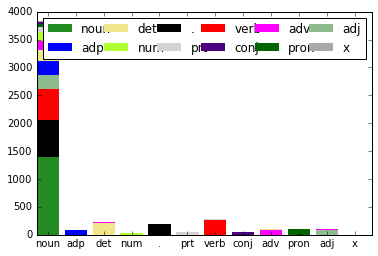

In [67]:
import lxmls.sequences.confusion_matrix as cm
import matplotlib.pyplot as plt
confusion_matrix = cm.build_confusion_matrix(test_seq.seq_list, viterbi_pred_test, len(corpus.tag_dict), hmm.get_num_states()) 
cm.plot_confusion_bar_graph(confusion_matrix, corpus.tag_dict, xrange(hmm.get_num_states()), 'Confusion matrix')
plt.show()

#  (OPTIONAL) Unsupervised Learning of HMMs


> If you have made it so far you are awesome! 

> Don't worry the next couple of exercices do not require to actually code anything.

We next address the problem of unsupervised learning. In this setting, 
we are not given any labeled data.

All we get to see is a set of natural language sentences. 

## Exercise 2.10

Implement the method to update the counts given the state and transition posteriors

```
def update_counts(self, sequence, state_posteriors, transition_posteriors):
```

Look at the code for EM algorithm in file ```sequences/hmm.py``` and check it for yourself.

In [ ]:
    def train_EM(self, dataset, smoothing=0, num_epochs=10, evaluate=True):
        self.initialize_random()

        if evaluate:
            acc = self.evaluate_EM(dataset)
            print "Initial accuracy: %f"%(acc)

        for t in xrange(1, num_epochs):
            #E-Step
            total_log_likelihood = 0.0
            self.clear_counts(smoothing)
            for sequence in dataset.seq_list:
                # Compute scores given the observation sequence.
                initial_scores, transition_scores, final_scores, emission_scores = \
                    self.compute_scores(sequence)

                state_posteriors, transition_posteriors, log_likelihood = \
                    self.compute_posteriors(initial_scores,
                                            transition_scores,
                                            final_scores,
                                            emission_scores)
                self.update_counts(sequence, state_posteriors, transition_posteriors)
                total_log_likelihood += log_likelihood

            print "Iter: %i Log Likelihood: %f"%(t, total_log_likelihood)
            #M-Step
            self.compute_parameters()
            if evaluate:
                 ### Evaluate accuracy at this iteration
                acc = self.evaluate_EM(dataset)
                print "Iter: %i Accuracy: %f"%(t,acc)


## Exercise 2.11

Run 20 epochs of the EM algorithm for part of speech induction:


In [ ]:
hmm.train_EM(train_seq, 0.1, 20, evaluate=True)
viterbi_pred_test = hmm.viterbi_decode_corpus(test_seq)
posterior_pred_test = hmm.posterior_decode_corpus(test_seq) 
eval_viterbi_test = hmm.evaluate_corpus(test_seq, viterbi_pred_test)
eval_posterior_test = hmm.evaluate_corpus(test_seq, posterior_pred_test)

In [ ]:
confusion_matrix = cm.build_confusion_matrix(test_seq.seq_list, viterbi_pred_test, len(corpus.tag_dict), hmm.get_num_states())

cm.plot_confusion_bar_graph(confusion_matrix, corpus.tag_dict, xrange(hmm.get_num_states()), 'Confusion matrix')